# <center>Network Science</center>

## <center>Home Assignment #1: Power law</center>

### <center>Student: *Gerasimova Olga*</center>

#### <hr /> General Information

**Due Date:** 15.02.2016 23:59 <br \>
**Late submission policy:** -2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2017] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [2]:
data = np.loadtxt("wordcounts.txt", skiprows=0, dtype="i8, S20")

In [3]:
freq = [data[i][0] for i in range(len(data))]

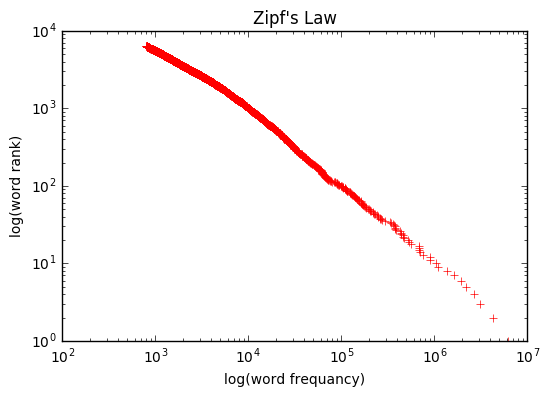

In [117]:
# 1.
plt.loglog(freq,range(1,len(data)+1), '+r')
plt.xlabel('log(word frequancy)')
plt.ylabel('log(word rank)')
plt.title("Zipf's Law")

Zipf’s law - the frequency of a word in an natural language corpus is inversely proportional to its rank in the frequency table:
$$freq(r)\sim\frac{1}{r}$$
$$freq(r)=\frac{const}{r}$$
$$log(freq(r))=log(const) - log(r)\ (*)$$

We can see from the picture above that the word frequancy is linear depended on its rank in logariphsm scale as in the formula (*).

log(const)= 17.255044729
coefficient before log(r) -1.18426529343


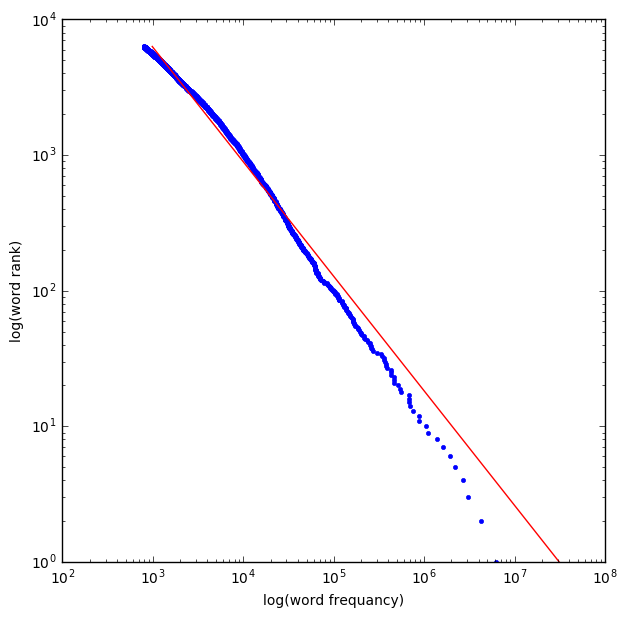

In [119]:
#Try to check  Zipf's Law via Linear Regression 

#log(freq(r)) = log(const) − log(r)
x_est = np.log(range(1,len(data)+1)) # log(r)
y_est = np.log(freq) # log(freq(r))

# Do estimation
X = np.vstack([np.ones(len(x_est)), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(freq,range(1,len(data)+1),'.b')
plt.plot(yt, xt, 'r')
plt.xlabel('log(word frequancy)')
plt.ylabel('log(word rank)')

print "log(const)=", Beta[0]
print "coefficient before log(r)", Beta[1] # it's approximately equal to -1 as in the formula (*)

In [4]:
# 2.  Kolmogorov-Smirnov test

# calculate F_exp
def gen(i):
    x = min(freq) + i*1000
    return x

k_exp = [gen(i) for i in range(int(round(max(freq)/1000)))]
k_exp.append(max(freq))
p_exp = []
freq_sort = np.sort(freq)
x = k_exp[0]
cur = 0
i_exp = 0
for i in range(len(freq_sort)):
    if freq_sort[i] <= x:
        cur += 1
    else:
        while(freq_sort[i] > x):
            p_exp.append(cur)
            i_exp += 1
            x = k_exp[i_exp]
        cur += 1   
p_exp.append(cur)
p_exp = [float(i)/p_exp[len(p_exp)-1] for i in p_exp]

In [5]:
D = []
r = copy.copy(k_exp)
for ind in range(len(r)):
    xmin = r[ind]
    p_k = []
    p_k = list(np.zeros(ind))
    
    sr = 0
    for f in freq:
        sr += np.log(float(f)/xmin)
    alpha = 1 + len(freq)/sr; # maximum likelihood estimation of parameter alpha
       
    # calculate F(x|alpha,xmin)
    for i in range(ind,len(r)): 
        p_k.append( 1 - (float(r[i])/xmin)**(-alpha + 1))
  

    # calculate values of D for different values of xmin
    D.append( max([abs(p_k[i] - p_exp[i]) for i in range(len(p_k))]))

# calculate D* corresponding to xmin*
for i in range(len(D)):
    if D[i] == min(D):
        id = i
        break
        
print "xmin =",r[id]

xmin = 800


In [208]:
xmin = r[id]
sr = 0
for i in freq:
    sr += np.log(i/xmin)   
alpha = 1+ len(freq)/sr; # maximum likelihood estimation of parameter alpha
print "alpha =",alpha

sigma2 = ((alpha - 1)/np.sqrt(len(freq)))**2 # error_estimate^2  
print "sigma2 =",sigma2

alpha = 1.82708018348
sigma2 = 0.000108271862917


In [209]:
# 3.
print "Minimum frequancy is", min(freq)
print "Maximum frequancy is", max(freq)
print "Mean frequancy is", np.mean(freq)
print "Median frequancy is", np.median(freq)

Minimum frequancy is 800
Maximum frequancy is 6187267
Mean frequancy is 13566.6707819
Median frequancy is 2335.0


### Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)

1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test
5. Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

### Routing network

In [7]:
edges1 = np.loadtxt("network.txt", skiprows=4, dtype="i8,i8")
G1 = nx.DiGraph()
G1.add_edges_from(edges1)

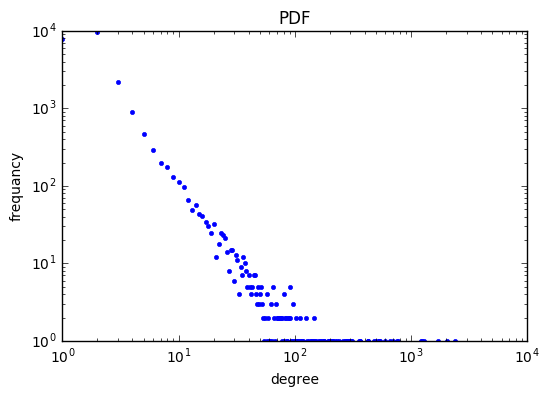

In [8]:
k1 = nx.degree(G1)

k1_uniq = list(set(k1.values()))
fr1 = np.zeros(len(k1_uniq))
for i in k1.values():
    for j in range(len(k1_uniq)):
        if i == k1_uniq[j]:
            fr1[j]+=1
            

plt.plot(k1_uniq, fr1,'.b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequancy')
plt.title('PDF')

According to the picture above we can say that this nerwork corresponds to power law.

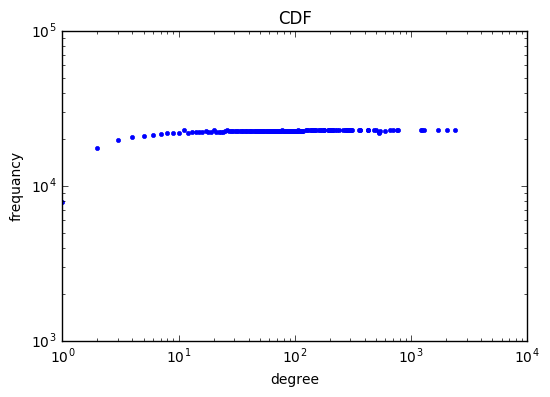

In [77]:
plt.plot(k1_uniq,np.cumsum(fr1),'.b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequancy')
plt.title('CDF')

In [21]:
#  Kolmogorov-Smirnov test

# calculate F_exp
k_exp = [i for i in range(min(k1.values()),max(k1.values())+1,2)]
k_exp.append(max(k1.values()))
p_exp = []
freq_sort = np.sort(k1.values())
x = k_exp[0]
cur = 0
i_exp = 0
for i in range(len(freq_sort)):
    if freq_sort[i] <= x:
        cur += 1
    else:
        while(freq_sort[i] > x):
            p_exp.append(cur)
            i_exp += 1
            x = k_exp[i_exp]
        cur += 1   
p_exp.append(cur)
p_exp = [float(i)/p_exp[len(p_exp)-1] for i in p_exp]

In [22]:
D = []
r = copy.copy(k_exp)
for ind in range(len(r)):
    xmin = r[ind]
    p_k = []
    p_k = list(np.zeros(ind))
    
    sr = 0
    for f in k1.values():
        sr += np.log(float(f)/xmin)
    alpha = 1 + len(k1.values())/sr; # maximum likelihood estimation of parameter alpha
       
    # calculate F(x|alpha,xmin)
    for i in range(ind,len(r)): 
        p_k.append( 1 - (float(r[i])/xmin)**(-alpha + 1))
  

    # calculate values of D for different values of xmin
    D.append( max([abs(p_k[i] - p_exp[i]) for i in range(len(p_k))]))

# calculate D* corresponding to xmin*
for i in range(len(D)):
    if D[i] == min(D):
        id = i
        break
        
print "xmin =",r[id]

xmin = 1


In [24]:
xmin = r[id]
sr = 0
for i in k1.values():
    sr += np.log(i/xmin)   
alpha = 1+ len(k1.values())/sr; # maximum likelihood estimation of parameter alpha
print "alpha =",alpha

alpha = 2.43517175294


In [83]:
max_in = 0
max_out = 0
mean_in = 0
mean_out = 0
for i in range(1,len(k1)+1):
    if G1.in_degree(i) > max_in:
        max_in = G1.in_degree(i)
    mean_in += G1.in_degree(i)
    
    if G1.out_degree(i) > max_out:
        max_out = G1.out_degree(i)
    mean_out += G1.out_degree(i) 
    
mean_in =  float(mean_in)/len(k1)
mean_out =  float(mean_out)/len(k1)

print "Max values of incoming node degrees is ", max_in  
print "Mean values of incoming node degrees is ", mean_in 
print "Max values of outcoming node degrees is ", max_out  
print "Mean values of outcoming node degrees is ", mean_out 

Max values of incoming node degrees is  40
Mean values of incoming node degrees is  2.10930627531
Max values of outcoming node degrees is  2389
Mean values of outcoming node degrees is  2.10930627531


It is clear that the mean values of incoming node degrees is equal to the mean values of outcoming node degrees, because every edge has both incoming and outcoming node.

### Web graph

In [25]:

edges2 = np.loadtxt("web_Stanford.txt", skiprows=4, dtype="i8,i8")
G2 = nx.DiGraph()
G2.add_edges_from(edges2)

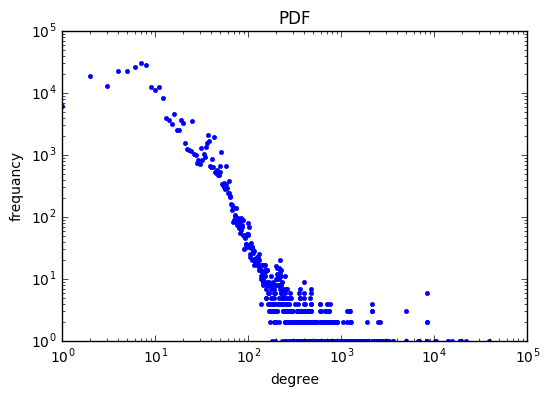

In [27]:
k2 = nx.degree(G2)

k2_uniq = list(set(k2.values()))
fr2 = np.zeros(len(k2_uniq))
for i in k2.values():
    for j in range(len(k2_uniq)):
        if i == k2_uniq[j]:
            fr2[j]+=1
            

plt.plot(k2_uniq, fr2,'.b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequancy')
plt.title('PDF')

According to the picture above we can say that this nerwork corresponds to power law, however there are greater number of outlines than in the previous case.

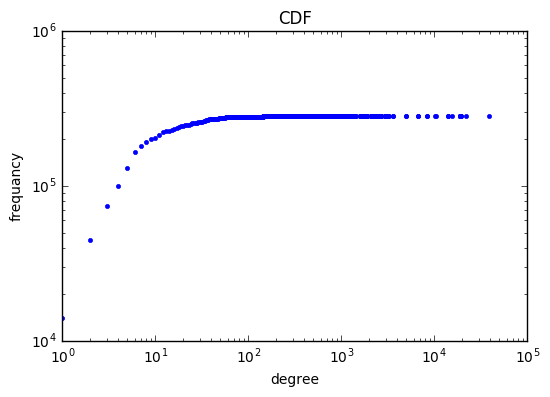

In [73]:
plt.plot(k2_uniq,np.cumsum(fr2),'.b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequancy')
plt.title('CDF')

In [46]:
#  Kolmogorov-Smirnov test

# calculate F_exp
k_exp = [i for i in range(min(k2.values()),max(k2.values())+1,50)]
k_exp.append(max(k2.values()))
p_exp = []
freq_sort = np.sort(k2.values())
x = k_exp[0]
cur = 0
i_exp = 0
for i in range(len(freq_sort)):
    if freq_sort[i] <= x:
        cur += 1
    else:
        while(freq_sort[i] > x):
            p_exp.append(cur)
            i_exp += 1
            x = k_exp[i_exp]
        cur += 1   
p_exp.append(cur)
p_exp = [float(i)/p_exp[len(p_exp)-1] for i in p_exp]

In [47]:
D = []
r = copy.copy(k_exp)
for ind in range(len(r)):
    xmin = r[ind]
    p_k = []
    p_k = list(np.zeros(ind))
    
    sr = 0
    for f in k2.values():
        sr += np.log(float(f)/xmin)
    alpha = 1 + len(k2.values())/sr; # maximum likelihood estimation of parameter alpha
       
    # calculate F(x|alpha,xmin)
    for i in range(ind,len(r)): 
        p_k.append( 1 - (float(r[i])/xmin)**(-alpha + 1))
  

    # calculate values of D for different values of xmin
    D.append( max([abs(p_k[i] - p_exp[i]) for i in range(len(p_k))]))

# calculate D* corresponding to xmin*
for i in range(len(D)):
    if D[i] == min(D):
        id = i
        break
        
print "xmin =",r[id]

xmin = 1


In [48]:
xmin = r[id]
sr = 0
for i in k2.values():
    sr += np.log(i/xmin)   
alpha = 1+ len(k2.values())/sr; # maximum likelihood estimation of parameter alpha
print "alpha =",alpha

alpha = 1.47123870626


In [84]:
max_in = 0
max_out = 0
mean_in = 0
mean_out = 0
for i in range(1,len(k2)+1):
    if G2.in_degree(i) > max_in:
        max_in = G2.in_degree(i)
    mean_in += G2.in_degree(i)
    
    if G2.out_degree(i) > max_out:
        max_out = G2.out_degree(i)
    mean_out += G2.out_degree(i) 
    
mean_in =  float(mean_in)/len(k2)
mean_out =  float(mean_out)/len(k2)

print "Max values of incoming node degrees is ", max_in  
print "Mean values of incoming node degrees is ", mean_in 
print "Max values of outcoming node degrees is ", max_out  
print "Mean values of outcoming node degrees is ", mean_out 

Max values of incoming node degrees is  38606
Mean values of incoming node degrees is  8.20316562789
Max values of outcoming node degrees is  255
Mean values of outcoming node degrees is  8.20316562789


#### Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

We will compare the following descriptive statistics:
1. clustering coefficient
2. size of GCC
3. average path length

In [49]:
n = G2.number_of_nodes()
m = G2.number_of_edges()
G2_nm = nx.gnm_random_graph(n,m,directed = True) # Erdos model

In [50]:
Cl_coeff_G2 = np.mean(k2.values())/n
Cl_coeff_G2_nm = np.mean(nx.degree(G2_nm).values())/n
print "Clustering coefficients:", Cl_coeff_G2,"(for Web Graph),",Cl_coeff_G2_nm,"(for Erdos model)"

Clustering coefficients: 5.81984982628e-05 (for Web Graph), 5.81984982628e-05 (for Erdos model)


$\textbf{Clustering coefficient}$ for Web Graph equals clustering coefficient for fitting Erdos model, because the number of nodes and edges are the same for them.

In [54]:
CC = nx.strongly_connected_components(G2)
CC_sort = sorted(CC, key = len, reverse=True)
SG = G2.subgraph(CC_sort[0]) # the greatest connected component
gk = nx.degree(SG)
id_gk = np.array(gk.keys())

In [61]:
CC = nx.strongly_connected_components(G2_nm)
CC_sort = sorted(CC, key = len, reverse=True)
SG_nm = G2_nm.subgraph(CC_sort[0]) # the greatest connected component
gk = nx.degree(SG_nm)
id_gk_nm = np.array(gk.keys())

In [53]:
print "size of GCC:", len(id_gk),"(for Web Graph),",len(id_gk_nm),"(for Erdos model)"

size of GCC: 150532 (for Web Graph), 281733 (for Erdos model)


We obtain that the $\textbf{size of GCC}$ for Web Graph is almost twice less than the size of GCC for Erdos model.

In [60]:
import random
N = 100 # we generate 100 random nodes of GCC, because the size of GCC is large (for Web Graph)
v = []
for i in range(N):
    c1 = random.sample(set(id_gk), 1);
    st = int(''.join(map(str,c1)))
    v.append(st)

paths = []    
v_uniq = list(set(v))
for i in v_uniq:
    for j in v_uniq:
        paths.append(len(nx.shortest_path(SG,source = i,target = j))) # calculate path between i-th and j-th vertices
path_avg = np.mean(paths) # calculate average path length in the graph

In [62]:
# we generate 100 random nodes of GCC, because the size of GCC is large (for Erdos model)
v = []
for i in range(N):
    c1 = random.sample(set(id_gk_nm), 1);
    st = int(''.join(map(str,c1)))
    v.append(st)

paths = []    
v_uniq = list(set(v))
for i in v_uniq:
    for j in v_uniq:
        paths.append(len(nx.shortest_path(SG_nm,source = i,target = j))) # calculate path between i-th and j-th vertices
path_avg_nm = np.mean(paths) # calculate average path length in the graph

In [63]:
print "L:",path_avg,"(for Web Graph),",path_avg_nm,"(for Erdos model)"

L: 12.8143 (for Web Graph), 7.0969 (for Erdos model)


Approximate $\textbf{average path length}$ for Web Graph is obtained longer than for Erdos model.